In [1]:
from IPython.display import Image

import dinkum
from dinkum.vfg import Gene, Receptor, Ligand
from dinkum.vfn import Tissue
from dinkum import Timecourse

from dinkum.display import MultiTissuePanel, tc_record_activity

## double negative gate

This is a simple model of the *S. purpuratus* double negative gate that functions in early development to specify the micromere lineage.

Ref: [A missing link in the sea urchin embryo gene regulatory network: hesC and the double-negative specification of micromeres](https://www.pnas.org/doi/10.1073/pnas.0705324104)

initializing: dinkum v0.4.4
start=1 stop=8


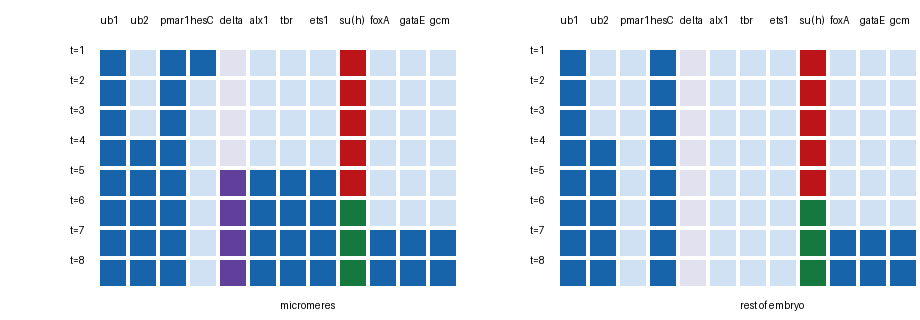

In [2]:
dinkum.reset()

# gataE, gcm, foxA

# set it all up!                                                            
pmar1 = Gene(name='pmar1')
hesC = Gene(name='hesC')
alx1 = Gene(name='alx1')
delta = Ligand(name='delta')
notch = Receptor(name='su(h)', ligand=delta)
tbr = Gene(name='tbr')
ets1 = Gene(name='ets1')
gataE = Gene(name='gataE')
gcm = Gene(name='gcm')
foxA = Gene(name='foxA')

embryo = Tissue(name='rest of embryo')
micromere = Tissue(name='micromeres')
embryo.add_neighbor(neighbor=micromere)

# maternal genes
early_ubiq = Gene(name='ub1')
late_ubiq = Gene(name='ub2')

## set up maternal gene expression

# early ubiq
early_ubiq.is_present(where=micromere, start=1)
early_ubiq.is_present(where=embryo, start=1)

# late ubiq
late_ubiq.is_present(where=micromere, start=4)
late_ubiq.is_present(where=embryo, start=4)

# pmar1: maternal in micromeres only
pmar1.is_present(where=micromere, start=1)

# hesC: present in both at the beginning
hesC.is_present(where=micromere, start=1, duration=1)
hesC.is_present(where=embryo, start=1, duration=1)

# notch: present everywhere (?)
notch.is_present(where=micromere, start=1)
notch.is_present(where=embryo, start=1)

## set up all downstream genes

# hesC: early, if not for pmar1
hesC.and_not(activator=early_ubiq, repressor=pmar1)

# alx &c: late, if not for hesC
alx1.and_not(activator=late_ubiq, repressor=hesC)
delta.and_not(activator=late_ubiq, repressor=hesC)
tbr.and_not(activator=late_ubiq, repressor=hesC)
ets1.and_not(activator=late_ubiq, repressor=hesC)

# gataE, gcm, foxA: all activated by notch
gataE.activated_by_and(sources=[late_ubiq, notch])
gcm.activated_by_and(sources=[late_ubiq, notch])
foxA.activated_by_and(sources=[late_ubiq, notch])

states, tissues, is_active_fn = tc_record_activity(stop=8)

mp = MultiTissuePanel(states=states, tissue_names=['micromeres', 'rest of embryo'],
                      genes_by_name=[early_ubiq.name, late_ubiq.name, pmar1.name, hesC.name,
                                     delta.name, alx1.name, tbr.name, ets1.name,
                                     notch.name, foxA.name, gataE.name, gcm.name])
mp.draw(is_active_fn)